Load Packages

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from Meta_fun import *
%matplotlib inline


Load Data set

In [2]:
# %load Pipeline_clean.py
%load_ext autoreload
%autoreload 2
from data_merge import *
from Clean_Fun import *

# NOTE have to use remove_invalid_rows() inside ALex's function,
# before we remove patient name
# %% Load dataset

live_path='Data/Cardiac Program_M.xlsx'
archive_path='Data/Cardiac Program_Archive.xlsx'
live_sheet_pkl='pickle_jar/live_sheets.pkl'
archive_sheet_pkl='pickle_jar/archive_sheets.pkl'
datecol_pkl='pickle_jar/datecols.pkl'
df = sheet_merge(live_path, archive_path,
    live_sheet_pkl, archive_sheet_pkl, datecol_pkl)


Live Sheet:
Sheet name: "patients"
Retained columns: ['patient_link', 'date_of_birth', 'patient_gender', 'ef', 'special_status']

Sheet name: "patient_enrollment_records"
Retained columns: ['patient_link', 'facilities_link', 'enrollment_date', 'hospital_discharged_from', 'admit_weight', 'diagnosis_1', 'acute_or_chronic', 'aicd', 'status', 'discharge', 'discharge_date', 'cardiac_related', 'create_user']

Sheet name: "patient weights"
Retained columns: ['patient_link', 'name', 'patient_weight_date', 'weight', 'this_weight_change', 'weight_change_since_admit']

Sheet name: "patient BNP"
Retained columns: ['patient_link', 'bnp_date', 'bnp', 'this_bnp_change']

Sheet name: "Cardiac_Meds"
Retained columns: ['patient_link', 'cardiac_meds_date', 'ace', 'bb', 'diuretics', 'anticoagulant', 'ionotropes', 'other cardiac meds']

Sheet name: "patient labs"
Retained columns: ['patient_link', 'labs_date', 'bun', 'cr', 'sodium', 'potasium', 'mg', 'this_cr_change']

Sheet name: "patient BP"
Retained col

In [3]:
df.to_csv("Data/after_merge.csv")

Apply the cleaning function to the data frame.

In [4]:
df = pd.read_csv("Data/after_merge.csv", index_col=0)

In [5]:
df=meta_clean(df)

EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
Couldn't extract EF so set to na_val
51 (30 -35)
Imputing 121.0,242.0 from other column
Imputing 90.0,180.0 from other column
Imputing 134,80 from Blood Pressure Column
Imputing 116,73 from Blood Pressure Column
Imputing 134,80 from Blood Pressure Column
Imputing 116,73 from Blood Pressure Column
num missing 383
value counts before zero and one assignment: 0                                                                             383
lisinopril 5mg qd                                                              41
none                                                                           35
lisinopril 2.5mg qd                                                            34
losartan 50mg qd                           

removing invalid row: 0

patient_link                             n0EPhlbX
enrollId                               n0EPhlbX_3
Enrollment_Date                               NaN
name                                 1 Tester, Mv
create_user        notifications@providerloop.com
Name: 0, dtype: object
--------------------------------------------------

 
 Dropped 1 rows from the dataset
New size of dataset: (763, 55)
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcom

/usr/lib/python3.7/site-packages/pandas/core/series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Format columns

In [6]:
from dtypeFun import *
dtypePkl = "pickle_jar/columnDtypes.pkl"
columnFormater(df, dtypePkl)

['date_of_birth'] columns set to datetime
['ef', 'admit_weight', 'weight', 'this_weight_change', 'weight_change_since_admit', 'bnp', 'this_bnp_change', 'bun', 'cr', 'sodium', 'potasium', 'mg', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'duration', 'age'] columns set to numeric


Columns to keep

In [9]:
column_dict=read_pkl('Models/model_columns.pkl')
keep_cols=column_dict['keep_cols']
pat_cols=column_dict['pat_cols']

In [7]:
df.columns

Index(['patient_link', 'date_of_birth', 'patient_gender', 'ef',
       'special_status', 'hospital_discharged_from', 'admit_weight',
       'acute_or_chronic', 'aicd', 'status', 'discharge', 'cardiac_related',
       'create_user', 'enrollId', 'name', 'patient_weight_date', 'weight',
       'this_weight_change', 'weight_change_since_admit', 'bnp_date', 'bnp',
       'this_bnp_change', 'cardiac_meds_date', 'ace', 'bb', 'diuretics',
       'anticoagulant', 'ionotropes', 'other_cardiac_meds', 'labs_date', 'bun',
       'cr', 'sodium', 'potasium', 'mg', 'this_cr_change', 'bp_date',
       'resting_hr', 'systolic', 'diastolic', 'resting_bp',
       'diastolic_heart_failure', 'cad/mi', 'heart_failure_unspecfied',
       'systolic_chf', 'atrial_fibrilation', 'cardiomyoapthy', 'lvad', 'chf',
       'duration', 'age', 'outcome', 'F_5nKZ993n', 'F_71ADiKaS', 'F_Fy1r9IXM',
       'F_KYzNhByH', 'F_L1V04aB0', 'F_US4llDDz', 'F_Xxk5Yn3E', 'F_kIUZIzRp',
       'F_mB0G57bu'],
      dtype='object')

In [11]:
print(keep_cols)

['patient_gender', 'ef', 'admit_weight', 'acute_or_chronic', 'weight', 'this_weight_change', 'weight_change_since_admit', 'bnp', 'this_bnp_change', 'ace', 'bb', 'diuretics', 'anticoagulant', 'ionotropes', 'other_cardiac_meds', 'bun', 'cr', 'potasium', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'outcome', 'cad/mi', 'heart_failure_unspecfied', 'diastolic_heart_failure', 'systolic_chf', 'atrial_fibrilation', 'cardiomyoapthy', 'lvad', 'chf', 'duration', 'age', 'F_5nKZ993n', 'F_71ADiKaS', 'F_Fy1r9IXM', 'F_KYzNhByH', 'F_L1V04aB0', 'F_US4llDDz', 'F_Xxk5Yn3E', 'F_kIUZIzRp', 'F_mB0G57bu']


In [12]:
column_dict["keep_cols"] = ['patient_gender', 'ef', 'admit_weight', 'weight', 'this_weight_change', 'weight_change_since_admit', 'bnp', 'this_bnp_change', 'ace', 'bb', 'diuretics', 'anticoagulant', 'ionotropes', 'other_cardiac_meds', 'bun', 'cr', 'potasium', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'outcome', 'cad/mi', 'heart_failure_unspecfied', 'diastolic_heart_failure', 'systolic_chf', 'atrial_fibrilation', 'cardiomyoapthy', 'lvad', 'chf', 'duration', 'age', 'F_5nKZ993n', 'F_71ADiKaS', 'F_Fy1r9IXM', 'F_KYzNhByH', 'F_L1V04aB0', 'F_US4llDDz', 'F_Xxk5Yn3E', 'F_kIUZIzRp', 'F_mB0G57bu']

In [ ]:
write_pkl(c'Models/model_columns.pkl')

## impute missing values

In [8]:
final_imputation(df)

Successfully imputed for all missing values


there remains 20 annoying patients with many missing values

In [56]:
df.loc[df.this_bnp_change < -10000, "this_bnp_change"] = np.nan

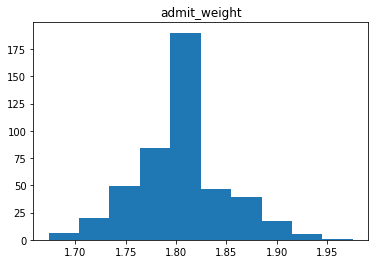

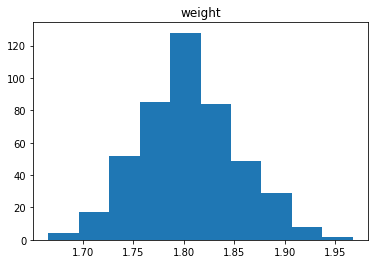

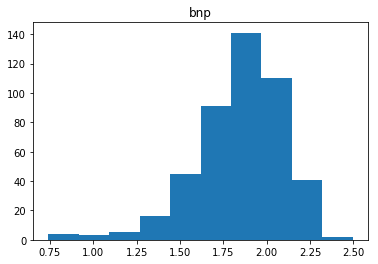

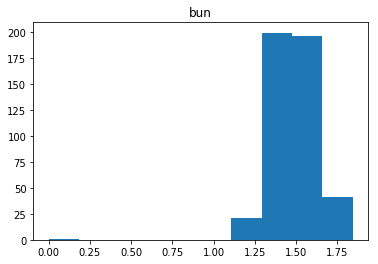

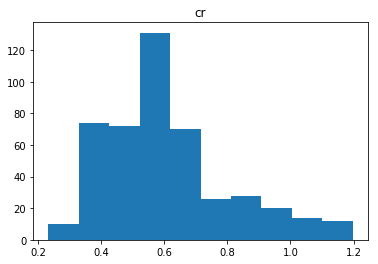

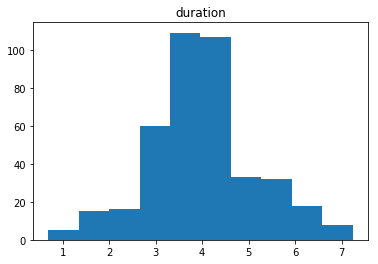

In [45]:
log_cols=['admit_weight', 'weight', 'bnp', 'bun', 'cr', "duration"]
for col in log_cols:
    df[col]=np.log1p(df[col])
    plt.hist(train(df)[col].dropna())
    plt.title(str(col))
    plt.show()

Only keep columns we're using.

In [59]:
df = df[keep_cols]

In [63]:
keep_cols

['patient_gender',
 'ef',
 'admit_weight',
 'acute_or_chronic',
 'weight',
 'this_weight_change',
 'weight_change_since_admit',
 'bnp',
 'this_bnp_change',
 'ace',
 'bb',
 'diuretics',
 'anticoagulant',
 'ionotropes',
 'other_cardiac_meds',
 'bun',
 'cr',
 'potasium',
 'this_cr_change',
 'resting_hr',
 'systolic',
 'diastolic',
 'outcome',
 'cad/mi',
 'heart_failure_unspecfied',
 'diastolic_heart_failure',
 'systolic_chf',
 'atrial_fibrilation',
 'cardiomyoapthy',
 'lvad',
 'chf',
 'duration',
 'age',
 'F_5nKZ993n',
 'F_71ADiKaS',
 'F_Fy1r9IXM',
 'F_KYzNhByH',
 'F_L1V04aB0',
 'F_US4llDDz',
 'F_Xxk5Yn3E',
 'F_kIUZIzRp',
 'F_mB0G57bu']

In [60]:
df.isna().sum()

patient_gender                 0
ef                             0
admit_weight                 132
acute_or_chronic              30
weight                         0
this_weight_change             0
weight_change_since_admit      0
bnp                            0
this_bnp_change                0
ace                            0
bb                             0
diuretics                      0
anticoagulant                  0
ionotropes                     0
other_cardiac_meds             0
bun                            0
cr                             0
potasium                       0
this_cr_change                 0
resting_hr                     0
systolic                       0
diastolic                      0
outcome                      303
cad/mi                         0
heart_failure_unspecfied       0
diastolic_heart_failure        0
systolic_chf                   0
atrial_fibrilation             0
cardiomyoapthy                 0
lvad                           0
chf       

In [30]:
train(df).isnull().sum()
df.dropna(inplace=True)

In [31]:
df.shape

(23, 42)

Remove patients with unknown outcome

In [52]:
df = df[df.outcome < 2]

### train-test split

In [62]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
import itertools

x=train(df).drop('outcome',axis=1)
y=train(df).outcome

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [63]:
y_train.value_counts()

0.0    166
1.0    161
Name: outcome, dtype: int64

### Attempt to fit logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [65]:
logistic = LogisticRegression()
grid_param=10**np.linspace(-2,5,50)
my_param_grid = {'C': grid_param }
para_search = GridSearchCV(estimator=logistic, param_grid= my_param_grid, scoring='accuracy', cv=5, return_train_score=True) #param_grid=grid_param,
para_search.fit(x_train,y_train)
print(para_search.best_score_)
print(para_search.best_params_)
prediction=para_search.predict(x_test)
cnf_matrix = confusion_matrix(y_test, prediction)
cnf_matrix

0.6422018348623854
{'C': 0.013894954943731374}


array([[32, 19],
       [17, 42]])

In [66]:
x_train.isna().sum()

patient_gender               0
ef                           0
admit_weight                 0
acute_or_chronic             0
weight                       0
this_weight_change           0
weight_change_since_admit    0
bnp                          0
this_bnp_change              0
ace                          0
bb                           0
diuretics                    0
anticoagulant                0
ionotropes                   0
other_cardiac_meds           0
bun                          0
cr                           0
potasium                     0
this_cr_change               0
resting_hr                   0
systolic                     0
diastolic                    0
cad/mi                       0
heart_failure_unspecfied     0
diastolic_heart_failure      0
systolic_chf                 0
atrial_fibrilation           0
cardiomyoapthy               0
lvad                         0
chf                          0
duration                     0
age                          0
F_5nKZ99

In [74]:
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
logistic.score(x_train, y_train)

0.691131498470948

In [97]:
logistic.score(x_test, y_test)

0.6090909090909091

In [80]:
coefficients = pd.DataFrame({"features" : x_train.columns, "coeffs" : logistic.coef_[0]})

In [83]:
print(coefficients.sort_values("coeffs"))

                     features    coeffs
37                 F_US4llDDz -0.622779
29                        chf -0.510551
36                 F_L1V04aB0 -0.510551
38                 F_Xxk5Yn3E -0.314692
40                 F_mB0G57bu -0.242063
1                          ef -0.236024
13                 ionotropes -0.194296
10                         bb -0.189787
23   heart_failure_unspecfied -0.180370
25               systolic_chf -0.129216
27             cardiomyoapthy -0.125408
24    diastolic_heart_failure -0.087585
32                 F_5nKZ993n -0.061970
19                 resting_hr -0.025114
17                   potasium -0.023104
15                        bun -0.021386
30                   duration -0.002148
4                      weight -0.001645
18             this_cr_change -0.001420
7                         bnp -0.000299
21                  diastolic  0.000485
8             this_bnp_change  0.000646
2                admit_weight  0.002790
5          this_weight_change  0.004779


## Random Forest

In [85]:
from sklearn import ensemble

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [86]:
randomForest = ensemble.RandomForestClassifier()

randomForest.fit(x_train, y_train)

In [96]:
randomForest.score(x_test, y_test)

0.6090909090909091

In [100]:
confusion_matrix(y_test, randomForest.predict(x_test))

array([[36, 15],
       [28, 31]])

In [91]:
forestImportance = pd.DataFrame({"features" : x_train.columns, "scores" : randomForest.feature_importances_})

In [98]:
print(forestImportance.sort_values("scores", ascending=False))

                     features    scores
30                   duration  0.092459
15                        bun  0.078817
19                 resting_hr  0.065027
7                         bnp  0.057685
8             this_bnp_change  0.057246
31                        age  0.057059
17                   potasium  0.055620
4                      weight  0.053579
18             this_cr_change  0.051636
21                  diastolic  0.049646
5          this_weight_change  0.048773
2                admit_weight  0.048224
6   weight_change_since_admit  0.038529
20                   systolic  0.038237
16                         cr  0.038136
1                          ef  0.036718
39                 F_kIUZIzRp  0.013767
23   heart_failure_unspecfied  0.010482
3            acute_or_chronic  0.010177
37                 F_US4llDDz  0.010125
38                 F_Xxk5Yn3E  0.009973
10                         bb  0.008451
34                 F_Fy1r9IXM  0.008224
9                         ace  0.007599


In [101]:
df.ef.max()

10.395

## PCA

In [65]:
# %%

from sklearn import decomposition
#from sklearn.pipeline import Pipeline
#from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import confusion_matrix
import itertools

# %%
x=train(df)[keep_cols].drop('outcome',axis=1).dropna()
y=train(df)[keep_cols].dropna()['outcome']

# x_train, x_test, y_train, y_test = train_test_split(x,y)

# logistic = linear_model.LogisticRegression()
pca = decomposition.PCA(n_components=3)
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

pca.fit(x)




PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
pd.DataFrame({"feature" : x.columns, "pca_1" : pca.components_[0]}).sort_values("pca_1")

,feature,pca_1
8,this_bnp_change,-9.992738e-01
30,duration,-3.798963e-02
21,diastolic,-1.636649e-03
18,this_cr_change,-1.099966e-03
38,F_Xxk5Yn3E,-7.020640e-05
22,cad/mi,-6.818232e-05
25,systolic_chf,-6.309404e-05
12,anticoagulant,-5.636411e-05
16,cr,-5.225822e-05
7,bnp,-5.148290e-05


In [67]:
pd.DataFrame({"feature" : x.columns, "pca_2" : pca.components_[1]}).sort_values("pca_2")

,feature,pca_2
8,this_bnp_change,-0.038002
3,acute_or_chronic,-0.000682
19,resting_hr,-0.000524
23,heart_failure_unspecfied,-0.000341
25,systolic_chf,-0.000324
22,cad/mi,-0.000315
14,other_cardiac_meds,-0.000297
26,atrial_fibrilation,-0.000213
11,diuretics,-0.000167
32,F_5nKZ993n,-0.000159


In [68]:
pca.explained_variance_ratio_

array([0.8259417 , 0.16550641, 0.00375135])

In [69]:
x_pca = pca.transform(x)

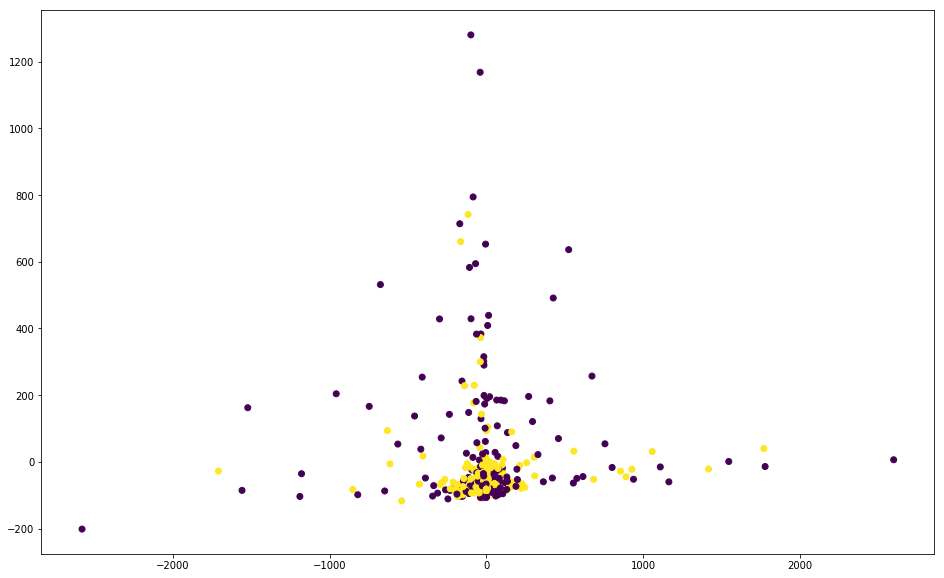

In [62]:
plt.rcParams['figure.figsize'] = (16,10)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.show()

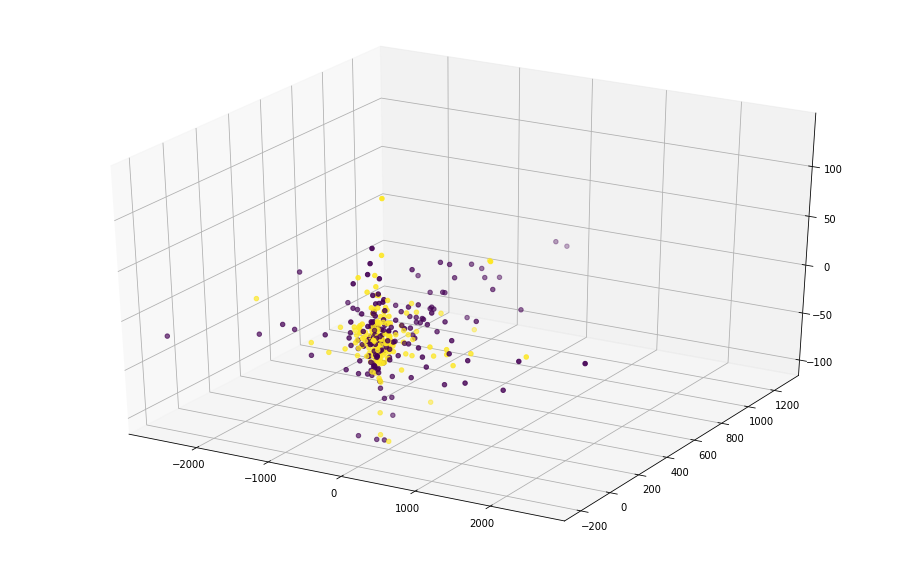

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = x_pca[:, 0], ys = x_pca[:, 1], zs = x_pca[:, 2], c=y)

In [83]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    z=x_pca[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color=y,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

ModuleNotFoundError: No module named 'plotly'

In [63]:
x.duration.sort_values().tail(10)

0       694.0
454     704.0
482     723.0
450     760.0
575     773.0
623     827.0
536     853.0
444     904.0
3      1276.0
485    1390.0
Name: duration, dtype: float64

In [64]:
x.duration.sort_values().head(10)

758    1.0
227    1.0
567    1.0
580    2.0
136    3.0
407    3.0
670    3.0
425    3.0
57     4.0
94     4.0
Name: duration, dtype: float64

In [ ]:
# %% Plo the PCA Spectrum

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# %%
n_components=[1,2,3,5,10]

Cs=10**np.linspace(-2,5,50)
my_param_dict = {'pca__n_components':n_components,
                    'logistic__C':Cs}
estimator = GridSearchCV(pipe,
                        my_param_dict)
                            # scoring='accuracy', cv=5,
                            #  return_train_score=True) #param_grid=grid_param,
estimator.fit(x,y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

estimator.best_score_

prediction=estimator.predict(x_test)
cnf_matrix = confusion_matrix(y_test, prediction)
cnf_matrix